importing necessary python library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

creating the data frame 

In [4]:
dataframe=pd.read_csv(r"c:\Users\Asus\Downloads\Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


getting summary of the dataframe use df.info()

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


checking for missing or null values to identify any data gaps


In [6]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


exploring restaurant types

Text(0.5, 0, 'type of resaturent')

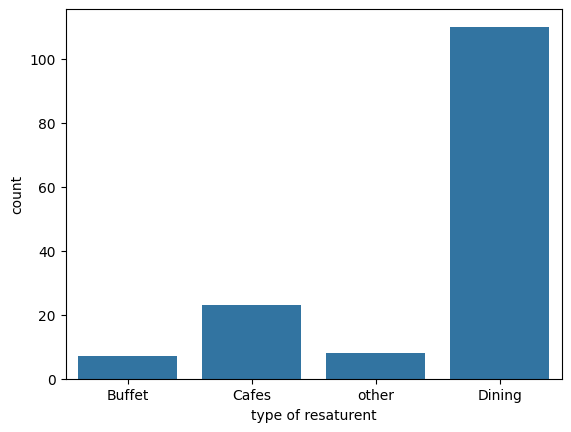

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of resaturent")

votes by restaurent type

Text(0, 0.5, 'votes')

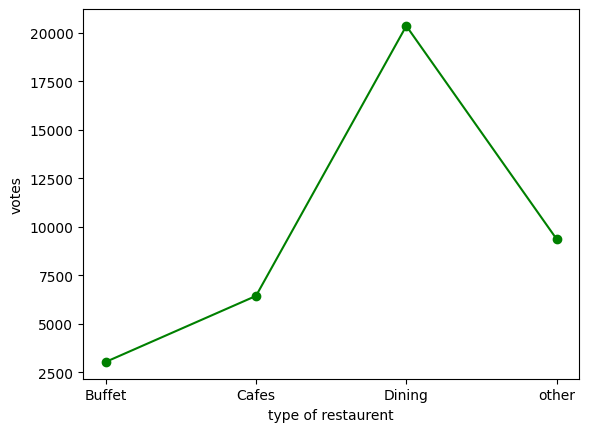

In [8]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('type of restaurent')
plt.ylabel('votes')

identify the most voted restaurant 

In [9]:
max_votes=dataframe['votes'].max()
restaurent_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print('restaurent with maximum vote:')
print(restaurent_with_max_votes)

restaurent with maximum vote:
38    Empire Restaurant
Name: name, dtype: object


online order availability

<Axes: xlabel='online_order', ylabel='count'>

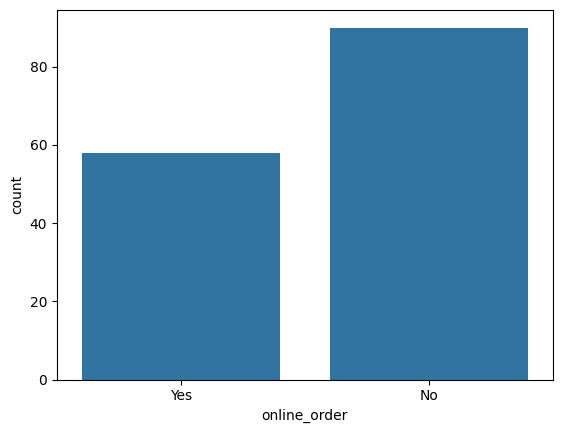

In [10]:
sns.countplot(x=dataframe['online_order'])

Analyze the ratings

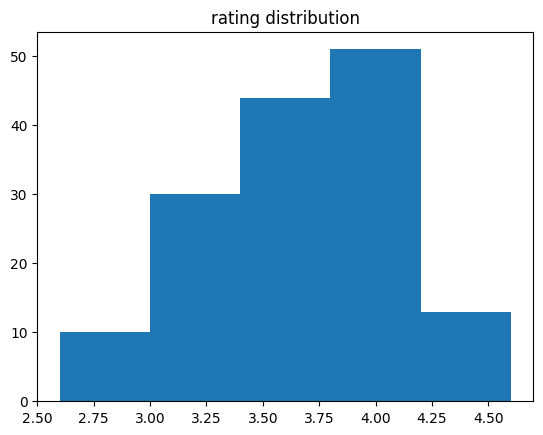

In [16]:
plt.hist(dataframe['rate'],bins=5)
plt.title('rating distribution')
plt.show()



raating comparison online vs ofline orders

<Axes: xlabel='online_order', ylabel='rate'>

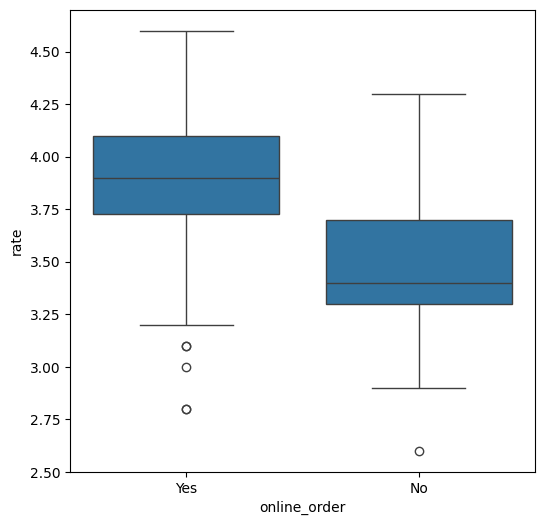

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

order mode preference by restaurant type

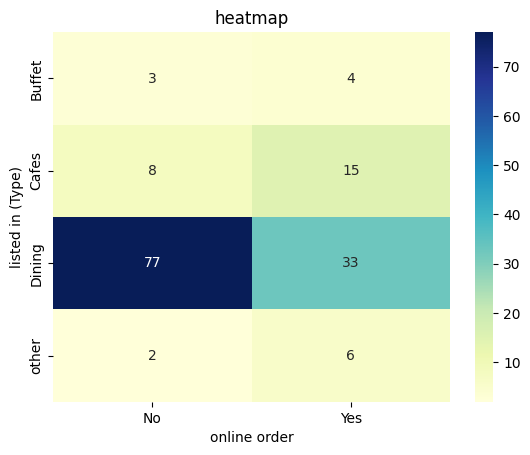

In [19]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('heatmap')
plt.xlabel('online order')
plt.ylabel('listed in (Type)')
plt.show()
